In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [5]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1,fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [7]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([0., 1., 3., 1., 2., 3.])

In [8]:
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts / 1000

tensor([0.1370, 0.1890, 0.1370, 0.1680, 0.1710, 0.1980])

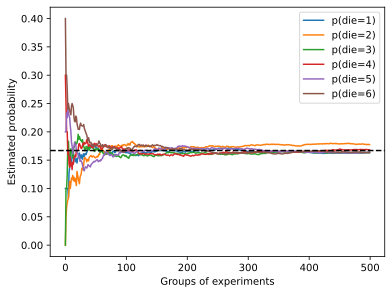

In [10]:
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=("p(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();